In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from sklearn.datasets import make_multilabel_classification
from rgb_nn import RGB_NN
import time

In [2]:
def plot_multi_lables(X, y):
    pd.DataFrame(X).plot(x=0,y=1,kind='scatter', c=y[:,0]+(y[:,1]*2), cmap='cool')
    plt.show()

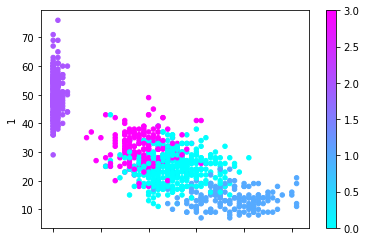

In [3]:
data = make_multilabel_classification(n_samples=1000, n_features=2, n_classes=2, n_labels=1, random_state=14)
plot_multi_lables(data[0],data[1])

In [4]:
from sklearn.neural_network import MLPClassifier
from sklearn import datasets, preprocessing
from sklearn.model_selection import train_test_split
import numpy as np

In [5]:
X = preprocessing.scale(data[0] ,axis=0)  
y = data[1]

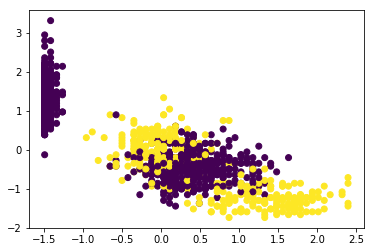

In [6]:
plt.scatter(x = X[:,0], y = X[:,1], c = y[:,0])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [14]:
nn = MLPClassifier(hidden_layer_sizes=(3), 
                   activation='logistic', 
                   learning_rate_init=0.02, 
                   max_iter=1, warm_start=True)

In [9]:
rgb = RGB_NN(server_loc='http://192.168.1.153:5000', scale=(-4.5,4.5))
# rgb._dummy_api = True
# rgb._verbose = False
rgb._brightness = 0.15

In [10]:
%matplotlib

Using matplotlib backend: MacOSX


In [15]:

# Create new Figure and an Axes which fills it.
fig, ax = plt.subplots()

scat = ax.scatter(X_test[:,0],
                  X_test[:,1],
                  s=50)

def update(frame_number):
    
    nn.fit(X_train, y_train)
    prediction = nn.predict(X_test)
    y = prediction[:,0]+(prediction[:,1]*2)
    cm = [plt.cm.cool(n) for n in y/3]
    
    
    rgb.display_weights(nn)
    
    print(nn.score(X_test, y_test))
    
    scat.set_facecolors(cm)

animation = FuncAnimation(fig, update, interval=1, repeat=0, frames=40)
plt.show()

/Users/zackakil/anaconda/envs/dev/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


0.148484848485
0.148484848485
0.148484848485
0.148484848485
0.390909090909
0.615151515152
0.651515151515
0.651515151515
0.651515151515
0.651515151515
0.651515151515
0.663636363636
0.70303030303
0.757575757576
0.745454545455
0.724242424242
0.733333333333
0.727272727273
0.727272727273
0.727272727273
0.727272727273
0.724242424242
0.724242424242
0.724242424242
0.721212121212
0.718181818182
0.721212121212
0.718181818182
0.718181818182
0.721212121212
0.724242424242
0.718181818182
0.724242424242
0.715151515152
0.724242424242
0.724242424242
0.715151515152
0.715151515152
0.712121212121
0.712121212121
0.715151515152


In [299]:
nn.coefs_

[array([[-5.36952356, -1.72024248,  5.10815695],
        [ 4.09068338,  1.9867092 , -2.09325361]]),
 array([[ 5.45190875,  3.53324708],
        [-8.59004428,  4.17241364],
        [ 5.39515024, -5.01913459]])]

In [23]:
nn.coefs_

0.857575757576


[array([[ 2.2461906 , -4.84329967, -3.62293346],
        [-3.10632936,  3.86306745,  1.42028583]]),
 array([[ 7.30860202, -5.69760468],
        [ 4.9032487 ,  3.93399005],
        [-9.73656385,  6.36673217]])]

0.860606060606
0.854545454545
0.857575757576
0.854545454545
